<h2><a href="https://leetcode.com/problems/most-stones-removed-with-same-row-or-column">947. Most Stones Removed with Same Row or Column</a></h2><h3>Medium</h3><hr><p>On a 2D plane, we place <code>n</code> stones at some integer coordinate points. Each coordinate point may have at most one stone.</p>

<p>A stone can be removed if it shares either <strong>the same row or the same column</strong> as another stone that has not been removed.</p>

<p>Given an array <code>stones</code> of length <code>n</code> where <code>stones[i] = [x<sub>i</sub>, y<sub>i</sub>]</code> represents the location of the <code>i<sup>th</sup></code> stone, return <em>the largest possible number of stones that can be removed</em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<pre>
<strong>Input:</strong> stones = [[0,0],[0,1],[1,0],[1,2],[2,1],[2,2]]
<strong>Output:</strong> 5
<strong>Explanation:</strong> One way to remove 5 stones is as follows:
1. Remove stone [2,2] because it shares the same row as [2,1].
2. Remove stone [2,1] because it shares the same column as [0,1].
3. Remove stone [1,2] because it shares the same row as [1,0].
4. Remove stone [1,0] because it shares the same column as [0,0].
5. Remove stone [0,1] because it shares the same row as [0,0].
Stone [0,0] cannot be removed since it does not share a row/column with another stone still on the plane.
</pre>

<p><strong class="example">Example 2:</strong></p>

<pre>
<strong>Input:</strong> stones = [[0,0],[0,2],[1,1],[2,0],[2,2]]
<strong>Output:</strong> 3
<strong>Explanation:</strong> One way to make 3 moves is as follows:
1. Remove stone [2,2] because it shares the same row as [2,0].
2. Remove stone [2,0] because it shares the same column as [0,0].
3. Remove stone [0,2] because it shares the same row as [0,0].
Stones [0,0] and [1,1] cannot be removed since they do not share a row/column with another stone still on the plane.
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> stones = [[0,0]]
<strong>Output:</strong> 0
<strong>Explanation:</strong> [0,0] is the only stone on the plane, so you cannot remove it.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= stones.length &lt;= 1000</code></li>
	<li><code>0 &lt;= x<sub>i</sub>, y<sub>i</sub> &lt;= 10<sup>4</sup></code></li>
	<li>No two stones are at the same coordinate point.</li>
</ul>


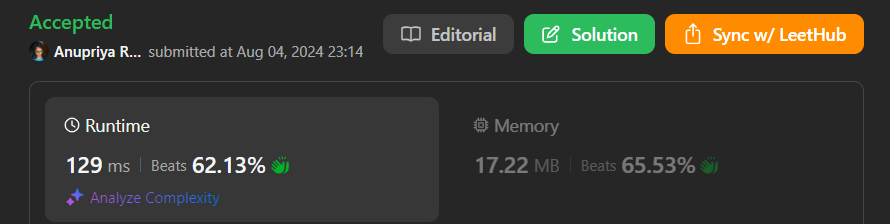

In [1]:
from typing import List

class Solution:
    def removeStones(self, stones: List[List[int]]) -> int:
        uf = {}
        def find(node):
            if node not in uf:
                uf[node] = node
            if uf[node] != node:
                uf[node] = find(uf[node])

            return uf[node]

        def union(u, v):
            root_u = find(u)
            root_v = find(v)
            uf[root_u] = root_v

        stone_nodes = []
        max_row = 0
        max_col = 0

        for x, y in stones:
            max_row =  max(max_row, x)
            max_col = max(max_col, y)


        for x, y in stones:
            union(x, y + max_row + 1)

        num_connected = 0
        for node in uf:
            if find(node) == node:
                num_connected += 1

        return len(stones) - num_connected